# Predicting depression and anxiety in college students during the Argentinean quarantine for the COVID-19 pandemic

# 3 of 5. Predicting anxiety in college students using binary classification

The data was collected for the study entitled "A longitudinal study on depression and anxiety in college students during the first 106-days of the lengthy Argentinean quarantine for the COVID-19 pandemic" by López Steinmetz et al., published in the Journal of Mental Health in 2021. To access the data, visit https://osf.io/2v84n/.

In this Jupyter notebook, supervised classification algorithms, namely logistic regression, random forest and support vector machine (SVM) classifiers are trained to predict high or low levels of anxiety in college students from the given data set. Anxiety levels were assessed using the Spanish version of the State-Trait Anxiety Inventory (Spielberger et al., 1983). Scores greater than 30 were considered to suggest high anxiety (Kendall et al., 1987). Based on this specified cut-off, in this classification task scores are assigned a negative or positive label (i.e., 0 or 1) which the algorithms are trained to predict correctly using the following features as inputs: continuous depression and anxiety scores from the first measurement, three broad quarantine subperiods to which answers were assigned based on the date of response for the first measurement, the sex and age of the participant, and their mental disorder and suicidal history. The performance of the models are evaluated across several metrics and compared with the performance of three dummy/baseline classifiers. 

<b>Prior to preprocessing, an initial inspection of the data was performed in the first notebook named '1_Data_intro.ipynb'. Descriptions of each column can also be found in the aforementioned notebook. For additional information about the data, visit https://doi.org/10.1080/09638237.2021.1952952.</b>

<b>Outline</b>
<br>
<br>3.1. Preprocessing the data
<br>3.2. Training the models
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1. Dummy classifiers (baselines)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2. Logistic regression classifier
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.3. Random forest classifier
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.4. SVM classfier
<br>3.3. Plotting the AUPRC and AUROC curves
<br>3.4. Comparing the performance of univariate and multivariate models (feature importance)

In [1]:
# Load 'dataset.xlsx' file as pandas DataFrame to keep tabular format
import pandas as pd

data = pd.read_excel('/Users/margaritasison/Downloads/M3.5 Lab Rotation 3/dataset.xlsx', sheet_name=0, header=0) # data = pd.read_excel('Edit string path accordingly', load first sheet, set first row as header)

### 3.1. Preprocessing the data

In [2]:
# Assign negative and positive labels to 'BANXIETY' scores based on the specified cut-off and store them into a new variable 'BANX_BINARY'

### Run the next two lines only once -- running them again causes the following error: 'cannot insert "BANX_BINARY", already exists'
BANX_BINARY = pd.cut(data.BANXIETY, bins=[0,30,99], labels=[0, 1], include_lowest=True) # [0, 30], (30, 99]

# Insert new column 'BANX_BINARY' into the existing DataFrame 'data'
data.insert(0, 'BANX_BINARY', BANX_BINARY)

In [3]:
# Drop columns 'participant', 'BDEPRESSION', and 'BANXIETY' 
data = data.drop(['participant', 'BDEPRESSION', 'BANXIETY'], axis=1)

In [4]:
# Convert 'quarantinesubperiod', 'sex', 'mentdishist', and 'suic' into dummy variables
print("Columns before 'get_dummies' conversion:\n{}".format(list(data.columns)))

data = pd.get_dummies(data, columns=['quarantinesubperiod', 'sex', 'mentdishist', 'suic'])
print("\nColumns after 'get_dummies' conversion:\n{}".format(list(data.columns)))

Columns before 'get_dummies' conversion:
['BANX_BINARY', 'ADEPRESSION', 'AANXIETY', 'quarantinesubperiod', 'sex', 'age', 'mentdishist', 'suic']

Columns after 'get_dummies' conversion:
['BANX_BINARY', 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes']


In [5]:
# Convert 'data' DataFrame into a NumPy array to make it compatible with scikit-learn functions
import numpy as np

data = np.array(data)

In [6]:
# Assign features to 'X' and target to 'y'
X = data[:, 1:] # 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
y = data[:, :1] # 'BANX_BINARY'

# Run the following lines to check 'X' and 'y':
print("First five rows of 'X':\n", X[0:5], "\nShape of 'X':", X.shape)
print("\nFirst five rows of 'y':\n", y[0:5], "\nShape of 'y':", y.shape)

First five rows of 'X':
 [[13 33 22  1  0  0  0  1  1  0  1  0]
 [16 21 24  1  0  0  0  1  1  0  0  1]
 [ 5 20 30  1  0  0  0  1  1  0  0  1]
 [28 41 22  1  0  0  0  1  0  1  0  1]
 [17 37 25  1  0  0  0  1  1  0  0  1]] 
Shape of 'X': (1492, 12)

First five rows of 'y':
 [[0]
 [0]
 [0]
 [1]
 [1]] 
Shape of 'y': (1492, 1)


In [7]:
# Split 'X' and 'y' into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    stratify=y) # Add 'stratify=y' parameter for classificattion

# Run the following lines to check training and test set dimensions:
print("Shape of 'X_train':", X_train.shape, "\nShape of 'y_train':", y_train.shape) # (1119, 12) (1119, 1)
print("Shape of 'X_test':", X_test.shape, "\nShape of 'y_test':", y_test.shape) # (373, 12) (373, 1)

Shape of 'X_train': (1119, 12) 
Shape of 'y_train': (1119, 1)
Shape of 'X_test': (373, 12) 
Shape of 'y_test': (373, 1)


In [8]:
# Assign the features that will be scaled to 'scaled_X_train' and 'scaled_X_test'
scaled_X_train = X_train[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'
scaled_X_test = X_test[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'

# Run the following lines to check 'scaled_X_train' and 'scaled_X_test':
print("First five rows of 'scaled_X_train' (before scaling):\n", scaled_X_train[0:5], "\nShape of 'scaled_X_train' (before scaling):", scaled_X_train.shape)
print("\nFirst five rows of 'scaled_X_test' (before scaling):\n", scaled_X_test[0:5], "\nShape of 'scaled_X_test' (before scaling):", scaled_X_test.shape)

First five rows of 'scaled_X_train' (before scaling):
 [[ 9 27 22]
 [ 0 19 24]
 [30 47 19]
 [40 51 26]
 [ 9 18 30]] 
Shape of 'scaled_X_train' (before scaling): (1119, 3)

First five rows of 'scaled_X_test' (before scaling):
 [[11 28 25]
 [ 3 12 22]
 [ 7  4 24]
 [ 8 19 18]
 [25 30 21]] 
Shape of 'scaled_X_test' (before scaling): (373, 3)


In [9]:
# Scale 'ADEPRESSION', 'AANXIETY' and 'age'
from sklearn.preprocessing import QuantileTransformer

qt_norm = QuantileTransformer(output_distribution='normal').fit(scaled_X_train)

scaled_X_train = qt_norm.transform(scaled_X_train)
scaled_X_test = qt_norm.transform(scaled_X_test)

# Run the following lines to check 'scaled_X_train' and 'scaled_X_test':
print("First five rows of 'scaled_X_train' (after scaling):\n", scaled_X_train[0:5], "\nShape of 'scaled_X_train' (after scaling):", scaled_X_train.shape)
print("\nFirst five rows of 'scaled_X_test' (after scaling):\n", scaled_X_test[0:5], "\nShape of 'scaled_X_test' (after scaling):", scaled_X_test.shape)

First five rows of 'scaled_X_train' (after scaling):
 [[-0.87904038 -0.23679889 -0.06654121]
 [-5.19933758 -0.90708024  0.51063079]
 [ 0.90897492  1.43197089 -1.17940175]
 [ 1.6252744   2.03310375  0.94169982]
 [-0.87904038 -0.98765156  1.35891295]] 
Shape of 'scaled_X_train' (after scaling): (1119, 3)

First five rows of 'scaled_X_test' (after scaling):
 [[-0.62719636 -0.17018472  0.7563332 ]
 [-1.83122433 -1.56272149 -0.06654121]
 [-1.17689044 -2.51179125  0.51063079]
 [-1.03793719 -0.90708024 -1.79237402]
 [ 0.53508282 -0.04015699 -0.40199502]] 
Shape of 'scaled_X_test' (after scaling): (373, 3)


In [10]:
# Apply dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=.95).fit(scaled_X_train)

PCA_scaled_X_train = pca.transform(scaled_X_train)
PCA_scaled_X_test = pca.transform(scaled_X_test)

# Run the following lines to check 'PCA_scaled_X_train' and 'PCA_scaled_X_test':
print("First five rows of 'PCA_scaled_X_train':\n", PCA_scaled_X_train[0:5], "\nShape of 'PCA_scaled_X_train':", PCA_scaled_X_train.shape)
print("\nFirst five rows of 'PCA_scaled_X_test':\n", PCA_scaled_X_test[0:5],  "\nShape of 'PCA_scaled_X_test':", PCA_scaled_X_test.shape)

First five rows of 'PCA_scaled_X_train':
 [[ 0.76613939  0.203997    0.43788523]
 [ 4.38218545  0.27604354  2.96105639]
 [-1.8464616   0.83126902  0.40478324]
 [-2.35810849 -1.42728795  0.30155823]
 [ 1.55011634 -1.08681182 -0.12326721]] 
Shape of 'PCA_scaled_X_train': (1119, 3)

First five rows of 'PCA_scaled_X_test':
 [[ 0.69971835 -0.6448967   0.29663052]
 [ 2.34294993  0.51475368  0.1518366 ]
 [ 2.63887021  0.00311625 -0.99388243]
 [ 1.0069401   2.01464602  0.09643344]
 [-0.42985261  0.32752863 -0.40192712]] 
Shape of 'PCA_scaled_X_test': (373, 3)


In [11]:
# Drop unscaled features from 'X_train' and 'X_test'
X_train = np.delete(X_train, [0, 1, 2], axis=1)
X_test = np.delete(X_test, [0, 1, 2], axis=1)

# Run the following lines to check 'X_train' and 'X_test':
print("First five rows of 'X_train':\n", X_train[0:5], "\nShape of 'X_train':", X_train.shape)
print("\nFirst five rows of 'X_test':\n", X_test[0:5], "\nShape of 'X_test':", X_test.shape)

First five rows of 'X_train':
 [[0 1 0 0 1 0 1 0 1]
 [1 0 0 1 0 1 0 1 0]
 [0 0 1 0 1 1 0 0 1]
 [1 0 0 1 0 0 1 0 1]
 [0 0 1 0 1 1 0 1 0]] 
Shape of 'X_train': (1119, 9)

First five rows of 'X_test':
 [[1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 1 0]
 [1 0 0 1 0 1 0 1 0]
 [1 0 0 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 0 1]] 
Shape of 'X_test': (373, 9)


In [12]:
# Concatenate scaled features and dummy variables
import numpy as np

X_train = np.concatenate([PCA_scaled_X_train, X_train], axis=1)
X_test = np.concatenate([PCA_scaled_X_test, X_test], axis=1)

# Run the following lines to check 'X_train' and 'X_test':
print("First five rows of 'X_train':\n", X_train[0:5], "\nShape of 'X_train':", X_train.shape)
print("\nFirst five rows of 'X_test':\n", X_test[0:5], "\nShape of 'X_test':", X_test.shape)

First five rows of 'X_train':
 [[ 0.76613939  0.203997    0.43788523  0.          1.          0.
   0.          1.          0.          1.          0.          1.        ]
 [ 4.38218545  0.27604354  2.96105639  1.          0.          0.
   1.          0.          1.          0.          1.          0.        ]
 [-1.8464616   0.83126902  0.40478324  0.          0.          1.
   0.          1.          1.          0.          0.          1.        ]
 [-2.35810849 -1.42728795  0.30155823  1.          0.          0.
   1.          0.          0.          1.          0.          1.        ]
 [ 1.55011634 -1.08681182 -0.12326721  0.          0.          1.
   0.          1.          1.          0.          1.          0.        ]] 
Shape of 'X_train': (1119, 12)

First five rows of 'X_test':
 [[ 0.69971835 -0.6448967   0.29663052  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 2.34294993  0.51475368  0.1518366   1.          0.      

### 3.2. Training the models

##### 3.2.1. Dummy classifiers (baselines)

In [13]:
### MAKE DUMMY CLASSIFIERS (BASELINES)
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample # For bootstrapping 'y_test' with replacement
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score, brier_score_loss, f1_score, hamming_loss, precision_score, recall_score  # Performance metrics

### BASELINE 1 OF 3: UNIFORM RANDOM BASELINE
uniform_rand_clf = DummyClassifier(strategy='uniform', random_state=0)

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_uniform_rand = []
auroc_uniform_rand = []
bal_acc_uniform_rand = []
brier_uniform_rand = []
f1_uniform_rand = []
hamm_uniform_rand = []
prec_uniform_rand = []
recall_uniform_rand = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    uniform_rand_clf = uniform_rand_clf.fit(X_train, y_train)
    y_prob = uniform_rand_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = uniform_rand_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_uniform_rand.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_uniform_rand.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_uniform_rand.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_uniform_rand.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_uniform_rand.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_uniform_rand.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_uniform_rand.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_uniform_rand.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for uniform random baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_uniform_rand), np.percentile(auprc_uniform_rand, 2.5), np.percentile(auprc_uniform_rand, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_uniform_rand), np.percentile(auroc_uniform_rand, 2.5), np.percentile(auroc_uniform_rand, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_uniform_rand), np.percentile(bal_acc_uniform_rand, 2.5), np.percentile(bal_acc_uniform_rand, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_uniform_rand), np.percentile(brier_uniform_rand, 2.5), np.percentile(brier_uniform_rand, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_uniform_rand), np.percentile(f1_uniform_rand, 2.5), np.percentile(f1_uniform_rand, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_uniform_rand), np.percentile(hamm_uniform_rand, 2.5), np.percentile(hamm_uniform_rand, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_uniform_rand), np.percentile(prec_uniform_rand, 2.5), np.percentile(prec_uniform_rand, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_uniform_rand), np.percentile(recall_uniform_rand, 2.5), np.percentile(recall_uniform_rand, 97.5)))


Mean scores for uniform random baseline with 95% confidence intervals:
    AUPRC: 0.46 [0.41, 0.51]
    AUROC: 0.50 [0.50, 0.50]
    Balanced accuracy: 0.50 [0.45, 0.54]
    Brier score loss: 0.25 [0.25, 0.25]
    F1 score: 0.49 [0.44, 0.55]
    Hamming loss: 0.50 [0.46, 0.55]
    Precision: 0.46 [0.39, 0.54]
    Recall: 0.52 [0.47, 0.57]


In [14]:
#####################################################
# Run this section to suppress warnings
from sklearn.exceptions import UndefinedMetricWarning

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#####################################################

### BASELINE 2 OF 3: MOST FREQUENT BASELINE
mfreq_clf = DummyClassifier(strategy='most_frequent')

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_mfreq = []
auroc_mfreq = []
bal_acc_mfreq = []
brier_mfreq = []
f1_mfreq = []
hamm_mfreq = []
prec_mfreq = []
recall_mfreq = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    mfreq_clf = mfreq_clf.fit(X_train, y_train)
    y_prob = mfreq_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = mfreq_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_mfreq.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_mfreq.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_mfreq.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_mfreq.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_mfreq.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_mfreq.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_mfreq.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_mfreq.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for most frequent baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_mfreq), np.percentile(auprc_mfreq, 2.5), np.percentile(auprc_mfreq, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_mfreq), np.percentile(auroc_mfreq, 2.5), np.percentile(auroc_mfreq, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_mfreq), np.percentile(bal_acc_mfreq, 2.5), np.percentile(bal_acc_mfreq, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_mfreq), np.percentile(brier_mfreq, 2.5), np.percentile(brier_mfreq, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_mfreq), np.percentile(f1_mfreq, 2.5), np.percentile(f1_mfreq, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_mfreq), np.percentile(hamm_mfreq, 2.5), np.percentile(hamm_mfreq, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_mfreq), np.percentile(prec_mfreq, 2.5), np.percentile(prec_mfreq, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_mfreq), np.percentile(recall_mfreq, 2.5), np.percentile(recall_mfreq, 97.5)))


Mean scores for most frequent baseline with 95% confidence intervals:
    AUPRC: 0.46 [0.41, 0.51]
    AUROC: 0.50 [0.50, 0.50]
    Balanced accuracy: 0.50 [0.50, 0.50]
    Brier score loss: 0.46 [0.41, 0.51]
    F1 score: 0.00 [0.00, 0.00]
    Hamming loss: 0.46 [0.41, 0.51]
    Precision: 0.00 [0.00, 0.00]
    Recall: 0.00 [0.00, 0.00]


In [15]:
### BASELINE 3 OF 3: STRATIFIED RANDOM BASELINE
strat_rand_clf = DummyClassifier(strategy='stratified', random_state=0)

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_strat_rand = []
auroc_strat_rand = []
bal_acc_strat_rand = []
brier_strat_rand = []
f1_strat_rand = []
hamm_strat_rand = []
prec_strat_rand = []
recall_strat_rand = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    strat_rand_clf = strat_rand_clf.fit(X_train, y_train)
    y_prob = strat_rand_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = strat_rand_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_strat_rand.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_strat_rand.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_strat_rand.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_strat_rand.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_strat_rand.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_strat_rand.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_strat_rand.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_strat_rand.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for stratified random baseline with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_strat_rand), np.percentile(auprc_strat_rand, 2.5), np.percentile(auprc_strat_rand, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_strat_rand), np.percentile(auroc_strat_rand, 2.5), np.percentile(auroc_strat_rand, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_strat_rand), np.percentile(bal_acc_strat_rand, 2.5), np.percentile(bal_acc_strat_rand, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_strat_rand), np.percentile(brier_strat_rand, 2.5), np.percentile(brier_strat_rand, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_strat_rand), np.percentile(f1_strat_rand, 2.5), np.percentile(f1_strat_rand, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_strat_rand), np.percentile(hamm_strat_rand, 2.5), np.percentile(hamm_strat_rand, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_strat_rand), np.percentile(prec_strat_rand, 2.5), np.percentile(prec_strat_rand, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_strat_rand), np.percentile(recall_strat_rand, 2.5), np.percentile(recall_strat_rand, 97.5)))

Mean scores for stratified random baseline with 95% confidence intervals:
    AUPRC: 0.46 [0.41, 0.51]
    AUROC: 0.50 [0.46, 0.54]
    Balanced accuracy: 0.50 [0.46, 0.54]
    Brier score loss: 0.50 [0.45, 0.54]
    F1 score: 0.46 [0.41, 0.52]
    Hamming loss: 0.50 [0.45, 0.54]
    Precision: 0.46 [0.39, 0.52]
    Recall: 0.47 [0.42, 0.52]


##### 3.2.2. Logistic regression classifier

In [16]:
### LOGISTIC REGRESSION CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

p_grid_LR = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]}

gs_LR = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', max_iter=500),
    param_grid=p_grid_LR,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_LR.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=500),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]},
             return_train_score=True, scoring='average_precision')

In [17]:
# print(gs_LR.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}". format(gs_LR.best_score_))
print("Best parameters for logistic regression classifier: {}".format(gs_LR.best_params_)) # Parameter setting that gave the best results on the hold out data.

# Obtain performance of logistic regression classifier on training set
LR_clf = gs_LR.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob = LR_clf.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred = LR_clf.predict(X_train)

print("\nPerformance of logistic regression classifier on training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob)))
print("    F1 score: {}".format(f1_score(y_train, y_pred)))
print("    Hamming loss: {}".format(hamming_loss(y_train, y_pred)))
print("    Precision: {}".format(precision_score(y_train, y_pred)))
print("    Recall: {}".format(recall_score(y_train, y_pred)))

Best AUPRC score (mean cross-validated score of best estimator): 0.8940408996032762
Best parameters for logistic regression classifier: {'C': 0.1}

Performance of logistic regression classifier on training set:
    AUPRC: 0.8908369786458338
    AUROC: 0.9071111682633575
    Balanced accuracy: 0.8209895197068089
    Brier score loss: 0.12295633448669988
    F1 score: 0.8080614203454893
    Hamming loss: 0.17873100983020554
    Precision: 0.7988614800759013
    Recall: 0.8174757281553398


In [18]:
# print(gs_LR.best_estimator_.score(X_test, y_test))

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_LR = []
auroc_LR = []
bal_acc_LR = []
brier_LR = []
f1_LR = []
hamm_LR = []
prec_LR = []
recall_LR = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob = LR_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = LR_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_LR.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_LR.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_LR.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_LR.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_LR.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_LR.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_LR.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_LR.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for logistic regression classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_LR), np.percentile(auprc_LR, 2.5), np.percentile(auprc_LR, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_LR), np.percentile(auroc_LR, 2.5), np.percentile(auroc_LR, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_LR), np.percentile(bal_acc_LR, 2.5), np.percentile(bal_acc_LR, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_LR), np.percentile(brier_LR, 2.5), np.percentile(brier_LR, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_LR), np.percentile(f1_LR, 2.5), np.percentile(f1_LR, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_LR), np.percentile(hamm_LR, 2.5), np.percentile(hamm_LR, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_LR), np.percentile(prec_LR, 2.5), np.percentile(prec_LR, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_LR), np.percentile(recall_LR, 2.5), np.percentile(recall_LR, 97.5)))

Mean scores for logistic regression classifier with 95% confidence intervals:
    AUPRC: 0.87 [0.82, 0.91]
    AUROC: 0.88 [0.84, 0.91]
    Balanced accuracy: 0.79 [0.75, 0.84]
    Brier score loss: 0.14 [0.12, 0.16]
    F1 score: 0.78 [0.73, 0.83]
    Hamming loss: 0.21 [0.16, 0.25]
    Precision: 0.77 [0.71, 0.84]
    Recall: 0.78 [0.72, 0.85]


##### 3.2.3. Random forest classifier

In [19]:
### RANDOM FOREST CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION
from sklearn.ensemble import RandomForestClassifier

p_grid_RF = {'n_estimators': [100, 500, 1000, 5000, 10000]}

gs_RF = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=p_grid_RF,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_RF.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000, 5000, 10000]},
             return_train_score=True, scoring='average_precision')

In [20]:
# print(gs_RF.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}". format(gs_RF.best_score_))
print("Best parameters for random forest classifier: {}".format(gs_RF.best_params_)) # Parameter setting that gave the best results on the hold out data.

# Obtain performance of random forest classifier on training set
RF_clf = gs_RF.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob = RF_clf.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred = RF_clf.predict(X_train)

print("\nPerformance of random forest classifier on training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob)))
print("    F1 score: {}".format(f1_score(y_train, y_pred)))
print("    Hamming loss: {}".format(hamming_loss(y_train, y_pred)))
print("    Precision: {}".format(precision_score(y_train, y_pred)))
print("    Recall: {}".format(recall_score(y_train, y_pred)))

Best AUPRC score (mean cross-validated score of best estimator): 0.8700593121373222
Best parameters for random forest classifier: {'n_estimators': 1000}

Performance of random forest classifier on training set:
    AUPRC: 0.9997299140352427
    AUROC: 0.9997846074712273
    Balanced accuracy: 0.9907204397865363
    Brier score loss: 0.022406103718500228
    F1 score: 0.9902534113060429
    Hamming loss: 0.008936550491510277
    Precision: 0.9941291585127201
    Recall: 0.9864077669902913


In [21]:
# print(gs_RF.best_estimator_.score(X_test, y_test))

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_RF = []
auroc_RF = []
bal_acc_RF = []
brier_RF = []
f1_RF = []
hamm_RF = []
prec_RF = []
recall_RF = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob = RF_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = RF_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_RF.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_RF.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_RF.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_RF.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_RF.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_RF.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_RF.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_RF.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for random forest classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_RF), np.percentile(auprc_RF, 2.5), np.percentile(auprc_RF, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_RF), np.percentile(auroc_RF, 2.5), np.percentile(auroc_RF, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_RF), np.percentile(bal_acc_RF, 2.5), np.percentile(bal_acc_RF, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_RF), np.percentile(brier_RF, 2.5), np.percentile(brier_RF, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_RF), np.percentile(f1_RF, 2.5), np.percentile(f1_RF, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_RF), np.percentile(hamm_RF, 2.5), np.percentile(hamm_RF, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_RF), np.percentile(prec_RF, 2.5), np.percentile(prec_RF, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_RF), np.percentile(recall_RF, 2.5), np.percentile(recall_RF, 97.5)))

Mean scores for random forest classifier with 95% confidence intervals:
    AUPRC: 0.82 [0.75, 0.87]
    AUROC: 0.84 [0.80, 0.88]
    Balanced accuracy: 0.77 [0.71, 0.81]
    Brier score loss: 0.16 [0.14, 0.19]
    F1 score: 0.74 [0.69, 0.79]
    Hamming loss: 0.23 [0.19, 0.29]
    Precision: 0.77 [0.69, 0.84]
    Recall: 0.72 [0.64, 0.78]


##### 3.2.4. SVM classifier

In [22]:
### SVM CLASSIFIER
# GRID SEARCH WITH STRATIFIED 10-FOLD CROSS-VALIDATION
from sklearn.svm import SVC

p_grid_SVC = [
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'kernel': ['rbf'],
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}, # np.logspace(-9, 3, 13)
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'kernel': ['linear']}]

gs_SVC = GridSearchCV(
    estimator=SVC(class_weight='balanced', random_state=0, probability=True),
    param_grid=p_grid_SVC,
    scoring='average_precision',
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_SVC.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=0),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='average_precision')

In [23]:
# print(gs_SVC.cv_results_)
print("Best AUPRC score (mean cross-validated score of best estimator): {}". format(gs_SVC.best_score_))
print("Best parameters for SVM classifier: {}".format(gs_SVC.best_params_)) # Parameter setting that gave the best results on the hold out data.

# Obtain performance of SVM classifier on training set
SVM_clf = gs_SVC.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_prob = SVM_clf.predict_proba(X_train)[:, 1] # probability estimates of the positive class
y_pred = SVM_clf.predict(X_train)

print("\nPerformance of SVM classifier on training set:")
print("    AUPRC: {}".format(average_precision_score(y_train, y_prob)))
print("    AUROC: {}".format(roc_auc_score(y_train, y_prob)))
print("    Balanced accuracy: {}".format(balanced_accuracy_score(y_train, y_pred)))
print("    Brier score loss: {}".format(brier_score_loss(y_train, y_prob)))
print("    F1 score: {}".format(f1_score(y_train, y_pred)))
print("    Hamming loss: {}".format(hamming_loss(y_train, y_pred)))
print("    Precision: {}".format(precision_score(y_train, y_pred)))
print("    Recall: {}".format(recall_score(y_train, y_pred)))

Best AUPRC score (mean cross-validated score of best estimator): 0.8952343458399957
Best parameters for SVM classifier: {'C': 1000, 'kernel': 'linear'}

Performance of SVM classifier on training set:
    AUPRC: 0.8925234411853022
    AUROC: 0.906837909085064
    Balanced accuracy: 0.8198755867035299
    Brier score loss: 0.12163018355258008
    F1 score: 0.8065447545717036
    Hamming loss: 0.17962466487935658
    Precision: 0.799618320610687
    Recall: 0.8135922330097087


In [24]:
# print(gs_SVC.best_estimator_.score(X_test, y_test))

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
auprc_SVC = []
auroc_SVC = []
bal_acc_SVC = []
brier_SVC = []
f1_SVC = []
hamm_SVC = []
prec_SVC = []
recall_SVC = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_prob = SVM_clf.predict_proba(X_test_resampled)[:, 1] # probability estimates of the positive class
    y_pred = SVM_clf.predict(X_test_resampled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    auprc_SVC.append(average_precision_score(y_test_resampled, y_prob)) # average_precision_score(y_true, y_score)
    auroc_SVC.append(roc_auc_score(y_test_resampled, y_prob)) # roc_auc_score(y_true, y_score)
    bal_acc_SVC.append(balanced_accuracy_score(y_test_resampled, y_pred)) # balanced_accuracy_score(y_true, y_pred, sample_weight=None, adjusted=False)
    brier_SVC.append(brier_score_loss(y_test_resampled, y_prob)) # brier_score_loss(y_true, y_prob)
    f1_SVC.append(f1_score(y_test_resampled, y_pred)) # f1_score(y_true, y_pred)
    hamm_SVC.append(hamming_loss(y_test_resampled, y_pred)) # hamming_loss(y_true, y_pred)
    prec_SVC.append(precision_score(y_test_resampled, y_pred)) # precision_score(y_true, y_pred)
    recall_SVC.append(recall_score(y_test_resampled, y_pred)) # recall_score(y_true, y_pred)

print("Mean scores for SVM classifier with 95% confidence intervals:")
print("    AUPRC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auprc_SVC), np.percentile(auprc_SVC, 2.5), np.percentile(auprc_SVC, 97.5)))
print("    AUROC: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(auroc_SVC), np.percentile(auroc_SVC, 2.5), np.percentile(auroc_SVC, 97.5)))
print("    Balanced accuracy: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(bal_acc_SVC), np.percentile(bal_acc_SVC, 2.5), np.percentile(bal_acc_SVC, 97.5)))
print("    Brier score loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(brier_SVC), np.percentile(brier_SVC, 2.5), np.percentile(brier_SVC, 97.5)))
print("    F1 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(f1_SVC), np.percentile(f1_SVC, 2.5), np.percentile(f1_SVC, 97.5)))
print("    Hamming loss: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(hamm_SVC), np.percentile(hamm_SVC, 2.5), np.percentile(hamm_SVC, 97.5)))
print("    Precision: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(prec_SVC), np.percentile(prec_SVC, 2.5), np.percentile(prec_SVC, 97.5)))
print("    Recall: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(recall_SVC), np.percentile(recall_SVC, 2.5), np.percentile(recall_SVC, 97.5)))

Mean scores for SVM classifier with 95% confidence intervals:
    AUPRC: 0.87 [0.82, 0.91]
    AUROC: 0.88 [0.84, 0.92]
    Balanced accuracy: 0.81 [0.77, 0.86]
    Brier score loss: 0.14 [0.12, 0.16]
    F1 score: 0.79 [0.75, 0.85]
    Hamming loss: 0.19 [0.14, 0.23]
    Precision: 0.80 [0.74, 0.86]
    Recall: 0.79 [0.74, 0.86]


### 3.3. Plotting the AUPRC and AUROC curves

##### AUPRC plots

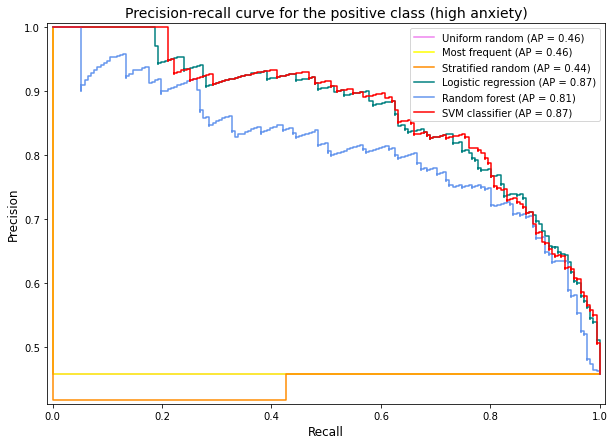

In [25]:
### AUPRC PLOT FOR THE POSITIVE CLASS (HIGH ANXIETY)
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 1] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 1] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 1] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_clf.predict_proba(X_test)[:, 1] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_clf.predict_proba(X_test)[:, 1] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_clf.predict_proba(X_test)[:, 1] # SVM CLASSIFIER

plt.figure(figsize=(10, 7))
ax_auprc1 = plt.axes()

disp1 = PrecisionRecallDisplay.from_predictions(y_test, y_score_uniform_rand, pos_label=1, name="Uniform random", ax=ax_auprc1, color="violet")
disp2 = PrecisionRecallDisplay.from_predictions(y_test, y_score_mfreq, pos_label=1, name="Most frequent", ax=ax_auprc1, color="yellow")
disp3 = PrecisionRecallDisplay.from_predictions(y_test, y_score_strat_rand, pos_label=1, name="Stratified random", ax=ax_auprc1, color="darkorange")
disp4 = PrecisionRecallDisplay.from_predictions(y_test, y_score_LR, pos_label=1, name="Logistic regression", ax=ax_auprc1, color="teal")
disp5 = PrecisionRecallDisplay.from_predictions(y_test, y_score_RF, pos_label=1, name="Random forest", ax=ax_auprc1, color="cornflowerblue")
disp6 = PrecisionRecallDisplay.from_predictions(y_test, y_score_SVC, pos_label=1, name="SVM classifier", ax=ax_auprc1, color="red")

ax_auprc1.set_title("Precision-recall curve for the positive class (high anxiety)", size=14)

ax_auprc1.legend(loc="best")

ax_auprc1.set_xlabel("Recall", size=12)
ax_auprc1.set_ylabel("Precision", size=12)

ax_auprc1.set_xmargin(0.01)
ax_auprc1.set_ymargin(0.01)

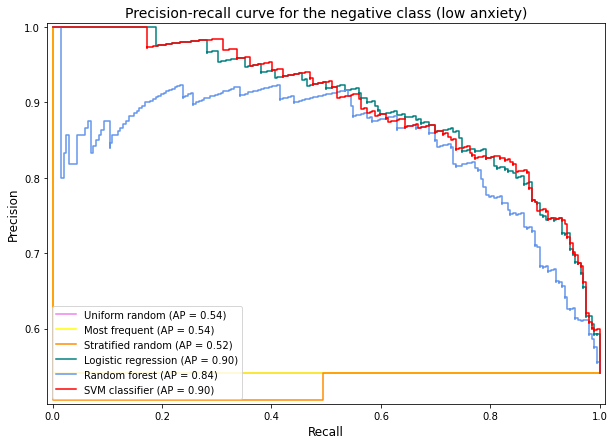

In [26]:
### AUPRC PLOT FOR THE NEGATIVE CLASS (LOW ANXIETY)
y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 0] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 0] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 0] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_clf.predict_proba(X_test)[:, 0] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_clf.predict_proba(X_test)[:, 0] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_clf.predict_proba(X_test)[:, 0] # SVM CLASSIFIER

plt.figure(figsize=(10, 7))
ax_auprc0 = plt.axes()

disp1 = PrecisionRecallDisplay.from_predictions(y_test, y_score_uniform_rand, pos_label=0, name="Uniform random", ax=ax_auprc0, color="violet")
disp2 = PrecisionRecallDisplay.from_predictions(y_test, y_score_mfreq, pos_label=0, name="Most frequent", ax=ax_auprc0, color="yellow")
disp3 = PrecisionRecallDisplay.from_predictions(y_test, y_score_strat_rand, pos_label=0, name="Stratified random", ax=ax_auprc0, color="darkorange")
disp4 = PrecisionRecallDisplay.from_predictions(y_test, y_score_LR, pos_label=0, name="Logistic regression", ax=ax_auprc0, color="teal")
disp5 = PrecisionRecallDisplay.from_predictions(y_test, y_score_RF, pos_label=0, name="Random forest", ax=ax_auprc0, color="cornflowerblue")
disp6 = PrecisionRecallDisplay.from_predictions(y_test, y_score_SVC, pos_label=0, name="SVM classifier", ax=ax_auprc0, color="red")

ax_auprc0.set_title("Precision-recall curve for the negative class (low anxiety)", size=14)

ax_auprc0.legend(loc="lower left")

ax_auprc0.set_xlabel("Recall", size=12)
ax_auprc0.set_ylabel("Precision", size=12)

ax_auprc0.set_xmargin(0.01)
ax_auprc0.set_ymargin(0.01)

##### AUROC plots

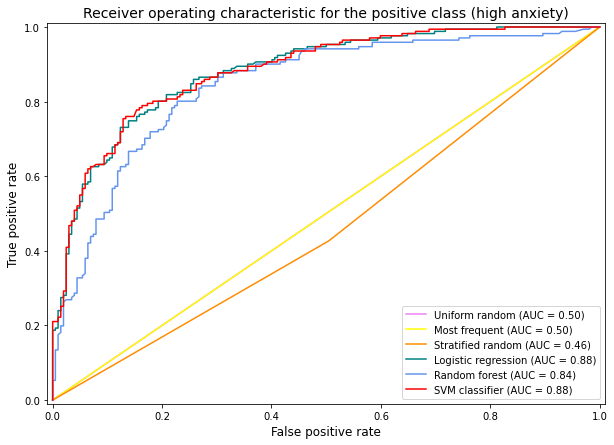

In [27]:
### AUROC PLOT FOR THE POSITIVE CLASS (HIGH ANXIETY)
from sklearn.metrics import RocCurveDisplay

y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 1] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 1] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 1] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_clf.predict_proba(X_test)[:, 1] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_clf.predict_proba(X_test)[:, 1] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_clf.predict_proba(X_test)[:, 1] # SVM CLASSIFIER

plt.figure(figsize=(10, 7))
ax_auroc1 = plt.axes()

disp1 = RocCurveDisplay.from_predictions(y_test, y_score_uniform_rand, pos_label=1, name="Uniform random", ax=ax_auroc1, color="violet")
disp2 = RocCurveDisplay.from_predictions(y_test, y_score_mfreq, pos_label=1, name="Most frequent", ax=ax_auroc1, color="yellow")
disp3 = RocCurveDisplay.from_predictions(y_test, y_score_strat_rand, pos_label=1, name="Stratified random", ax=ax_auroc1, color="darkorange")
disp4 = RocCurveDisplay.from_predictions(y_test, y_score_LR, pos_label=1, name="Logistic regression", ax=ax_auroc1, color="teal")
disp5 = RocCurveDisplay.from_predictions(y_test, y_score_RF, pos_label=1, name="Random forest", ax=ax_auroc1, color="cornflowerblue")
disp6 = RocCurveDisplay.from_predictions(y_test, y_score_SVC, pos_label=1, name="SVM classifier", ax=ax_auroc1, color="red")

ax_auroc1.set_title("Receiver operating characteristic for the positive class (high anxiety)", size=14)

ax_auroc1.legend(loc="best")

ax_auroc1.set_xlabel("False positive rate", size=12)
ax_auroc1.set_ylabel("True positive rate", size=12)

ax_auroc1.set_xmargin(0.01)
ax_auroc1.set_ymargin(0.01)

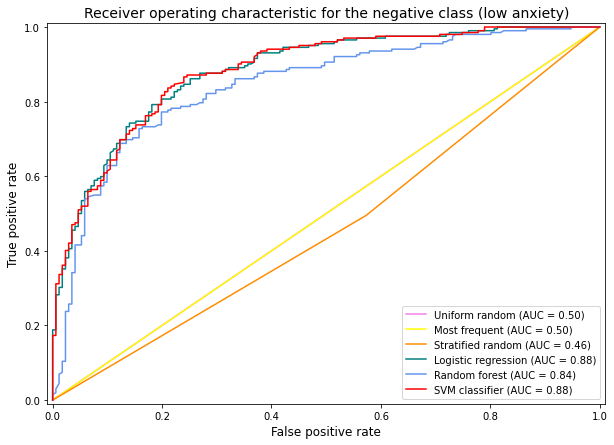

In [28]:
### AUROC PLOT FOR THE NEGATIVE CLASS (LOW ANXIETY)
y_score_uniform_rand = uniform_rand_clf.predict_proba(X_test)[:, 0] # UNIFORM RANDOM BASELINE
y_score_mfreq = mfreq_clf.predict_proba(X_test)[:, 0] # MOST FREQUENT BASELINE
y_score_strat_rand = strat_rand_clf.predict_proba(X_test)[:, 0] # STRATIFIED RANDOM BASELINE
y_score_LR = LR_clf.predict_proba(X_test)[:, 0] # LOGISTIC REGRESSION CLASSIFIER
y_score_RF = RF_clf.predict_proba(X_test)[:, 0] # RANDOM FOREST CLASSIFIER
y_score_SVC = SVM_clf.predict_proba(X_test)[:, 0] # SVM CLASSIFIER

plt.figure(figsize=(10, 7))
ax_auroc0 = plt.axes()

disp1 = RocCurveDisplay.from_predictions(y_test, y_score_uniform_rand, pos_label=0, name="Uniform random", ax=ax_auroc0, color="violet")
disp2 = RocCurveDisplay.from_predictions(y_test, y_score_mfreq, pos_label=0, name="Most frequent", ax=ax_auroc0, color="yellow")
disp3 = RocCurveDisplay.from_predictions(y_test, y_score_strat_rand, pos_label=0, name="Stratified random", ax=ax_auroc0, color="darkorange")
disp4 = RocCurveDisplay.from_predictions(y_test, y_score_LR, pos_label=0, name="Logistic regression", ax=ax_auroc0, color="teal")
disp5 = RocCurveDisplay.from_predictions(y_test, y_score_RF, pos_label=0, name="Random forest", ax=ax_auroc0, color="cornflowerblue")
disp6 = RocCurveDisplay.from_predictions(y_test, y_score_SVC, pos_label=0, name="SVM classifier", ax=ax_auroc0, color="red")

ax_auroc0.set_title("Receiver operating characteristic for the negative class (low anxiety)", size=14)

ax_auroc0.legend(loc="best")

ax_auroc0.set_xlabel("False positive rate", size=12)
ax_auroc0.set_ylabel("True positive rate", size=12)

ax_auroc0.set_xmargin(0.01)
ax_auroc0.set_ymargin(0.01)

##### Extra plots: confusion matrices

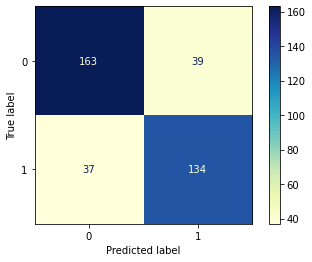

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Generate a confusion matrix for the logistic regression classifier
y_pred_LR = LR_clf.predict(X_test)
cm_LR = confusion_matrix(y_test, y_pred_LR)
cm_display = ConfusionMatrixDisplay(cm_LR).plot(cmap='YlGnBu')


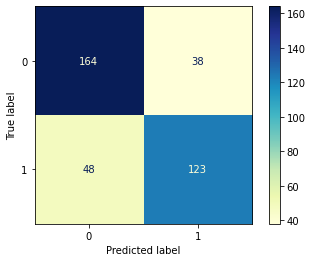

In [30]:
# Generate a confusion matrix for the random forest classifier
y_pred_RF = RF_clf.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_RF)
cm_display = ConfusionMatrixDisplay(cm_RF).plot(cmap='YlGnBu')


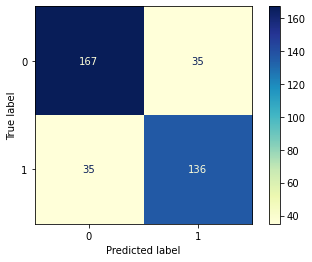

In [31]:
# Generate a confusion matrix for the SVM classifier
y_pred_SVC = SVM_clf.predict(X_test)
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
cm_display = ConfusionMatrixDisplay(cm_SVC).plot(cmap='YlGnBu')

### 3.4. Feature importance: univariate versus multivariate scores

In [32]:
# Load 'dataset.xlsx' file again as pandas DataFrame
data = pd.read_excel('/Users/margaritasison/Downloads/M3.5 Lab Rotation 3/dataset.xlsx', sheet_name=0, header=0)

##### Preprocessing

In [33]:
# Assign negative and positive labels to 'BANXIETY' scores based on the specified cut-off and store them into a new variable 'BANX_BINARY'

### Run the next two lines only once -- running them again causes the following error: 'cannot insert "BANX_BINARY", already exists'
BANX_BINARY = pd.cut(data.BANXIETY, bins=[0,30,99], labels=[0, 1], include_lowest=True) # [0, 30], (30, 99]

# Insert new column 'BANX_BINARY' into the existing DataFrame 'data'
data.insert(0, 'BANX_BINARY', BANX_BINARY)

In [34]:
# Assign the target 'BANX_BINARY' and each feature to separate variables
ADEPRESSION = data[['BANX_BINARY', 'ADEPRESSION']]
AANXIETY = data[['BANX_BINARY', 'AANXIETY']]
quarantinesubperiod = data[['BANX_BINARY', 'quarantinesubperiod']]
sex = data[['BANX_BINARY', 'sex']]
age = data[['BANX_BINARY', 'age']]
mentdishist = data[['BANX_BINARY', 'mentdishist']]
suic = data[['BANX_BINARY', 'suic']]

In [35]:
# Convert categorical features into dummy variables
quarantinesubperiod = pd.get_dummies(quarantinesubperiod, columns=['quarantinesubperiod'])
sex = pd.get_dummies(sex, columns=['sex'])
mentdishist = pd.get_dummies(mentdishist, columns=['mentdishist'])
suic = pd.get_dummies(suic, columns=['suic'])

# Run the following lines to check if the conversion was executed correctly:
print("'quarantinesubperiod' columns:\n{}".format(list(quarantinesubperiod.columns)))
print("\n'sex' columns:\n{}".format(list(sex.columns)))
print("\n'mentdishist' columns:\n{}".format(list(mentdishist.columns)))
print("\n'suic' columns:\n{}".format(list(suic.columns)))

'quarantinesubperiod' columns:
['BANX_BINARY', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third']

'sex' columns:
['BANX_BINARY', 'sex_man', 'sex_woman']

'mentdishist' columns:
['BANX_BINARY', 'mentdishist_no', 'mentdishist_yes']

'suic' columns:
['BANX_BINARY', 'suic_no', 'suic_yes']


In [36]:
# Convert DataFrames into NumPy arrays to make them compatible with scikit-learn functions
ADEPRESSION = np.array(ADEPRESSION)
AANXIETY = np.array(AANXIETY)
quarantinesubperiod = np.array(quarantinesubperiod)
sex = np.array(sex)
age = np.array(age)
mentdishist = np.array(mentdishist)
suic = np.array(suic)

In [37]:
# Assign features to 'X' and target to 'y'
print("Shown below are the first five rows of each variable and their corresponding shape.")

# ADEPRESSION
ADEP_X = ADEPRESSION[:, 1:]
ADEP_y = ADEPRESSION[:, :1]

# Run the following lines to check 'ADEP_X' and 'ADEP_y':
print("\n'ADEP_X':\n", ADEP_X[0:5], ADEP_X.shape)
print("\n'ADEP_y':\n", ADEP_y[0:5], ADEP_y.shape)
##################################################

# AANXIETY
AANX_X = AANXIETY[:, 1:]
AANX_y = AANXIETY[:, :1]

# Run the following lines to check 'AANX_X' and 'AANX_y':
print("\n'AANX_X':\n", AANX_X[0:5], AANX_X.shape)
print("\n'AANX_y':\n", AANX_y[0:5], AANX_y.shape)
##################################################

# quarantinesubperiod
quar_X = quarantinesubperiod[:, 1:]
quar_y = quarantinesubperiod[:, :1]

# Run the following lines to check 'quar_X' and 'quar_y':
print("\n'quar_X':\n", quar_X[0:5], quar_X.shape)
print("\n'quar_y':\n", quar_y[0:5], quar_y.shape)
##################################################

# sex
sex_X = sex[:, 1:]
sex_y = sex[:, :1]

# Run the following lines to check 'sex_X' and 'sex_y':
print("\n'sex_X':\n", sex_X[0:5], sex_X.shape)
print("\n'sex_y':\n", sex_y[0:5], sex_y.shape)
##################################################

# age
age_X = age[:, 1:]
age_y = age[:, :1]

# Run the following lines to check 'age_X' and 'age_y':
print("\n'age_X':\n", age_X[0:5], age_X.shape)
print("\n'age_y':\n", age_y[0:5], age_y.shape)
##################################################

# mentdishist
ment_X = mentdishist[:, 1:]
ment_y = mentdishist[:, :1]

# Run the following lines to check 'ment_X' and 'ment_y':
print("\n'ment_X':\n", ment_X[0:5], ment_X.shape)
print("\n'ment_y':\n", ment_y[0:5], ment_y.shape)
##################################################

# suic
suic_X = suic[:, 1:]
suic_y = suic[:, :1]

# Run the following lines to check 'suic_X' and 'suic_y':
print("\n'suic_X':\n", suic_X[0:5], suic_X.shape)
print("\n'suic_y':\n", suic_y[0:5], suic_y.shape)

Shown below are the first five rows of each variable and their corresponding shape.

'ADEP_X':
 [[13]
 [16]
 [ 5]
 [28]
 [17]] (1492, 1)

'ADEP_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'AANX_X':
 [[33]
 [21]
 [20]
 [41]
 [37]] (1492, 1)

'AANX_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'quar_X':
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]] (1492, 3)

'quar_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'sex_X':
 [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'sex_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'age_X':
 [[22]
 [24]
 [30]
 [22]
 [25]] (1492, 1)

'age_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'ment_X':
 [[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]] (1492, 2)

'ment_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)

'suic_X':
 [[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'suic_y':
 [[0]
 [0]
 [0]
 [1]
 [1]] (1492, 1)


In [38]:
# Split 'X' and 'y' into a training set and a test set

# 'ADEPRESSION' feature
ADEP_X_train, ADEP_X_test, ADEP_y_train, ADEP_y_test = train_test_split(
    ADEP_X, ADEP_y,
    random_state=0,
    stratify=ADEP_y)

# Run the following lines to check training and test set dimensions:
print("'ADEPRESSION' training set - ", "features: {}; target: {}".format(ADEP_X_train.shape, ADEP_y_train.shape))
print("'ADEPRESSION' test set - ", "features: {}; target: {}".format(ADEP_X_test.shape, ADEP_y_test.shape))
####################################################################################################

# 'AANXIETY' feature
AANX_X_train, AANX_X_test, AANX_y_train, AANX_y_test = train_test_split(
    AANX_X, AANX_y,
    random_state=0,
    stratify=AANX_y)

# Run the following lines to check training and test set dimensions:
print("\n'AANXIETY' training set - ", "features: {}; target: {}".format(AANX_X_train.shape, AANX_y_train.shape))
print("'AANXIETY' test set - ", "features: {}; target: {}".format(AANX_X_test.shape, AANX_y_test.shape))
####################################################################################################

# 'quarantinesubperiod' feature
quar_X_train, quar_X_test, quar_y_train, quar_y_test = train_test_split(
    quar_X, quar_y,
    random_state=0,
    stratify=quar_y)

# Run the following lines to check training and test set dimensions:
print("\n'quarantinesubperiod' training set - ", "features: {}; target: {}".format(quar_X_train.shape, quar_y_train.shape))
print("'quarantinesubperiod' test set - ", "features: {}; target: {}".format(quar_X_test.shape, quar_y_test.shape))
####################################################################################################

# 'sex' feature
sex_X_train, sex_X_test, sex_y_train, sex_y_test = train_test_split(
    sex_X, sex_y,
    random_state=0,
    stratify=sex_y)

# Run the following lines to check training and test set dimensions:
print("\n'sex' training set - ", "features: {}; target: {}".format(sex_X_train.shape, sex_y_train.shape))
print("'sex' test set - ", "features: {}; target: {}".format(sex_X_test.shape, sex_y_test.shape))
####################################################################################################

# 'age' feature
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(
    age_X, age_y,
    random_state=0,
    stratify=age_y)

# Run the following lines to check training and test set dimensions:
print("\n'age' training set - ", "features: {}; target: {}".format(age_X_train.shape, age_y_train.shape))
print("'age' test set - ", "features: {}; target: {}".format(age_X_test.shape, age_y_test.shape))
####################################################################################################

# 'mentdishist' feature
ment_X_train, ment_X_test, ment_y_train, ment_y_test = train_test_split(
    ment_X, ment_y,
    random_state=0,
    stratify=ment_y)

# Run the following lines to check training and test set dimensions:
print("\n'mentdishist' training set - ", "features: {}; target: {}".format(ment_X_train.shape, ment_y_train.shape))
print("'mentdishist' test set - ", "features: {}; target: {}".format(ment_X_test.shape, ment_y_test.shape))
####################################################################################################

# 'suic' feature
suic_X_train, suic_X_test, suic_y_train, suic_y_test = train_test_split(
    suic_X, suic_y,
    random_state=0,
    stratify=suic_y)

# Run the following lines to check training and test set dimensions:
print("\n'suic' training set - ", "features: {}; target: {}".format(suic_X_train.shape, suic_y_train.shape))
print("'suic' test set - ", "features: {}; target: {}".format(suic_X_test.shape, suic_y_test.shape))

'ADEPRESSION' training set -  features: (1119, 1); target: (1119, 1)
'ADEPRESSION' test set -  features: (373, 1); target: (373, 1)

'AANXIETY' training set -  features: (1119, 1); target: (1119, 1)
'AANXIETY' test set -  features: (373, 1); target: (373, 1)

'quarantinesubperiod' training set -  features: (1119, 3); target: (1119, 1)
'quarantinesubperiod' test set -  features: (373, 3); target: (373, 1)

'sex' training set -  features: (1119, 2); target: (1119, 1)
'sex' test set -  features: (373, 2); target: (373, 1)

'age' training set -  features: (1119, 1); target: (1119, 1)
'age' test set -  features: (373, 1); target: (373, 1)

'mentdishist' training set -  features: (1119, 2); target: (1119, 1)
'mentdishist' test set -  features: (373, 2); target: (373, 1)

'suic' training set -  features: (1119, 2); target: (1119, 1)
'suic' test set -  features: (373, 2); target: (373, 1)


In [39]:
# Scale the features
print("Shown below are the first five rows of each variable and their corresponding shape.")

# 'ADEPRESSION'
qt_norm = QuantileTransformer(output_distribution='normal').fit(ADEP_X_train)
ADEP_X_train = qt_norm.transform(ADEP_X_train)
ADEP_X_test = qt_norm.transform(ADEP_X_test)

# Run the following lines to check 'ADEP_X_train' and 'ADEP_X_test':
print("'ADEP_X_train':\n", ADEP_X_train[0:5], ADEP_X_train.shape)
print("\n'ADEP_X_test':\n", ADEP_X_test[0:5], ADEP_X_test.shape)
################################################################################

# 'AANXIETY'
qt_norm = QuantileTransformer(output_distribution='normal').fit(AANX_X_train)
AANX_X_train = qt_norm.transform(AANX_X_train)
AANX_X_test = qt_norm.transform(AANX_X_test)

# Run the following lines to check 'AANX_X_train' and 'AANX_X_test':
print("\n'AANX_X_train':\n", AANX_X_train[0:5], AANX_X_train.shape)
print("\n'AANX_X_test':\n", AANX_X_test[0:5], AANX_X_test.shape)
################################################################################

# 'age'
qt_norm = QuantileTransformer(output_distribution='normal').fit(age_X_train)
age_X_train = qt_norm.transform(age_X_train)
age_X_test = qt_norm.transform(age_X_test)

# Run the following lines to check 'age_X_train' and 'age_X_test':
print("\n'age_X_train':\n", age_X_train[0:5], age_X_train.shape)
print("\n'age_X_test':\n", age_X_test[0:5], age_X_test.shape)

Shown below are the first five rows of each variable and their corresponding shape.
'ADEP_X_train':
 [[-0.87904038]
 [-5.19933758]
 [ 0.90897492]
 [ 1.6252744 ]
 [-0.87904038]] (1119, 1)

'ADEP_X_test':
 [[-0.62719636]
 [-1.83122433]
 [-1.17689044]
 [-1.03793719]
 [ 0.53508282]] (373, 1)

'AANX_X_train':
 [[-0.23679889]
 [-0.90708024]
 [ 1.43197089]
 [ 2.03310375]
 [-0.98765156]] (1119, 1)

'AANX_X_test':
 [[-0.17018472]
 [-1.56272149]
 [-2.51179125]
 [-0.90708024]
 [-0.04015699]] (373, 1)

'age_X_train':
 [[-0.06654121]
 [ 0.51063079]
 [-1.17940175]
 [ 0.94169982]
 [ 1.35891295]] (1119, 1)

'age_X_test':
 [[ 0.7563332 ]
 [-0.06654121]
 [ 0.51063079]
 [-1.79237402]
 [-0.40199502]] (373, 1)


##### Logistic regression classifier

In [40]:
# Obtain the univariate scores
ADEP_LR_score = []
AANX_LR_score = []
quar_LR_score = []
sex_LR_score = []
age_LR_score = []
ment_LR_score = []
suic_LR_score = []

# 'ADEPRESSION'
ADEP_LR = gs_LR.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_LR.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_LR_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_LR = gs_LR.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_LR.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_LR_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_LR = gs_LR.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_LR.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_LR_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_LR = gs_LR.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_LR.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_LR_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_LR = gs_LR.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_LR.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_LR_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_LR = gs_LR.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_LR.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_LR_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_LR = gs_LR.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_LR.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_LR_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for logistic regression classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_LR_score), np.percentile(ADEP_LR_score, 2.5), np.percentile(ADEP_LR_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_LR_score), np.percentile(AANX_LR_score, 2.5), np.percentile(AANX_LR_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_LR_score), np.percentile(quar_LR_score, 2.5), np.percentile(quar_LR_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_LR_score), np.percentile(sex_LR_score, 2.5), np.percentile(sex_LR_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_LR_score), np.percentile(age_LR_score, 2.5), np.percentile(age_LR_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_LR_score), np.percentile(ment_LR_score, 2.5), np.percentile(ment_LR_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_LR_score), np.percentile(suic_LR_score, 2.5), np.percentile(suic_LR_score, 97.5)))

Mean univariate scores for logistic regression classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.75 [0.68, 0.81]
    'AANXIETY' average precision score: 0.87 [0.82, 0.91]
    'quarantinesubperiod' average precision score: 0.48 [0.41, 0.53]
    'sex' average precision score: 0.48 [0.43, 0.54]
    'age' average precision score: 0.56 [0.49, 0.62]
    'mentdishist' average precision score: 0.51 [0.45, 0.57]
    'suic' average precision score: 0.57 [0.51, 0.63]


In [41]:
# Prepare the inputs for the plot
scores = [auprc_LR, ADEP_LR_score, AANX_LR_score, quar_LR_score, sex_LR_score, age_LR_score, ment_LR_score, suic_LR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

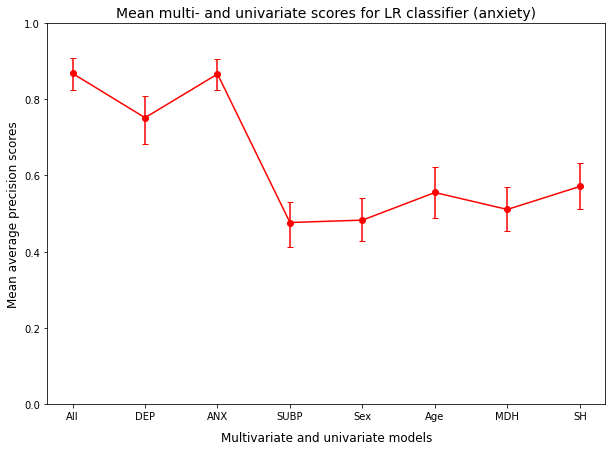

In [42]:
# Generate the plot
plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(0, 1)

plt.title('Mean multi- and univariate scores for LR classifier (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean average precision scores', size=12)

plt.show()

##### Random forest classifier

In [43]:
# Obtain the univariate scores
ADEP_RF_score = []
AANX_RF_score = []
quar_RF_score = []
sex_RF_score = []
age_RF_score = []
ment_RF_score = []
suic_RF_score = []

# 'ADEPRESSION'
ADEP_RF = gs_RF.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_RF.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_RF_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_RF = gs_RF.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_RF.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_RF_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_RF = gs_RF.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_RF.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_RF_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_RF = gs_RF.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_RF.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_RF_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_RF = gs_RF.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_RF.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_RF_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_RF = gs_RF.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_RF.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_RF_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_RF = gs_RF.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_RF.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_RF_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for logistic regression classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_RF_score), np.percentile(ADEP_RF_score, 2.5), np.percentile(ADEP_RF_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_RF_score), np.percentile(AANX_RF_score, 2.5), np.percentile(AANX_RF_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_RF_score), np.percentile(quar_RF_score, 2.5), np.percentile(quar_RF_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_RF_score), np.percentile(sex_RF_score, 2.5), np.percentile(sex_RF_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_RF_score), np.percentile(age_RF_score, 2.5), np.percentile(age_RF_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_RF_score), np.percentile(ment_RF_score, 2.5), np.percentile(ment_RF_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_RF_score), np.percentile(suic_RF_score, 2.5), np.percentile(suic_RF_score, 97.5)))

Mean univariate scores for logistic regression classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.75 [0.68, 0.80]
    'AANXIETY' average precision score: 0.85 [0.79, 0.90]
    'quarantinesubperiod' average precision score: 0.48 [0.41, 0.53]
    'sex' average precision score: 0.48 [0.43, 0.54]
    'age' average precision score: 0.53 [0.46, 0.59]
    'mentdishist' average precision score: 0.51 [0.45, 0.57]
    'suic' average precision score: 0.57 [0.51, 0.63]


In [44]:
# Prepare the inputs for the plot
scores = [auprc_RF, ADEP_RF_score, AANX_RF_score, quar_RF_score, sex_RF_score, age_RF_score, ment_RF_score, suic_RF_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

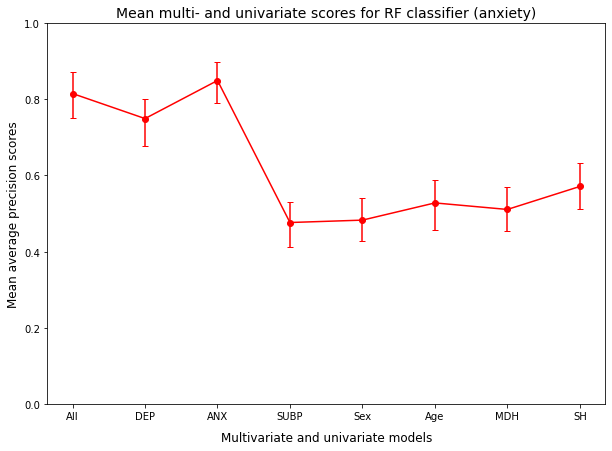

In [45]:
# Generate the plot
plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(0, 1)

plt.title('Mean multi- and univariate scores for RF classifier (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean average precision scores', size=12)

plt.show()

##### SVM classifier

In [46]:
# Obtain the univariate scores
ADEP_SVC_score = []
AANX_SVC_score = []
quar_SVC_score = []
sex_SVC_score = []
age_SVC_score = []
ment_SVC_score = []
suic_SVC_score = []

# 'ADEPRESSION'
ADEP_SVC = gs_SVC.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train))

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_prob = ADEP_SVC.predict_proba(ADEP_X_test_resampled)[:, 1] # probability estimates of the positive class
    ADEP_SVC_score.append(average_precision_score(ADEP_y_test_resampled, ADEP_y_prob)) # average_precision_score(y_true, y_score)

# 'AANXIETY'
AANX_SVC = gs_SVC.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_prob = AANX_SVC.predict_proba(AANX_X_test_resampled)[:, 1] # probability estimates of the positive class
    AANX_SVC_score.append(average_precision_score(AANX_y_test_resampled, AANX_y_prob)) # average_precision_score(y_true, y_score)

# 'quarantinesubperiod'
quar_SVC = gs_SVC.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_prob = quar_SVC.predict_proba(quar_X_test_resampled)[:, 1] # probability estimates of the positive class
    quar_SVC_score.append(average_precision_score(quar_y_test_resampled, quar_y_prob)) # average_precision_score(y_true, y_score

# 'sex'
sex_SVC = gs_SVC.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_prob = sex_SVC.predict_proba(sex_X_test_resampled)[:, 1] # probability estimates of the positive class
    sex_SVC_score.append(average_precision_score(sex_y_test_resampled, sex_y_prob)) # average_precision_score(y_true, y_score)

# 'age'
age_SVC = gs_SVC.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_prob = age_SVC.predict_proba(age_X_test_resampled)[:, 1] # probability estimates of the positive class
    age_SVC_score.append(average_precision_score(age_y_test_resampled, age_y_prob)) # average_precision_score(y_true, y_score)

# 'mentdishist'
ment_SVC = gs_SVC.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_prob = ment_SVC.predict_proba(ment_X_test_resampled)[:, 1] # probability estimates of the positive class
    ment_SVC_score.append(average_precision_score(ment_y_test_resampled, ment_y_prob)) # average_precision_score(y_true, y_score)

# 'suic'
suic_SVC = gs_SVC.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_prob = suic_SVC.predict_proba(suic_X_test_resampled)[:, 1] # probability estimates of the positive class
    suic_SVC_score.append(average_precision_score(suic_y_test_resampled, suic_y_prob)) # average_precision_score(y_true, y_score)

print("Mean univariate scores for logistic regression classifier with 95% confidence intervals:")
print("    'ADEPRESSION' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_SVC_score), np.percentile(ADEP_SVC_score, 2.5), np.percentile(ADEP_SVC_score, 97.5)))
print("    'AANXIETY' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_SVC_score), np.percentile(AANX_SVC_score, 2.5), np.percentile(AANX_SVC_score, 97.5)))
print("    'quarantinesubperiod' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_SVC_score), np.percentile(quar_SVC_score, 2.5), np.percentile(quar_SVC_score, 97.5)))
print("    'sex' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_SVC_score), np.percentile(sex_SVC_score, 2.5), np.percentile(sex_SVC_score, 97.5)))
print("    'age' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_SVC_score), np.percentile(age_SVC_score, 2.5), np.percentile(age_SVC_score, 97.5)))
print("    'mentdishist' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_SVC_score), np.percentile(ment_SVC_score, 2.5), np.percentile(ment_SVC_score, 97.5)))
print("    'suic' average precision score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_SVC_score), np.percentile(suic_SVC_score, 2.5), np.percentile(suic_SVC_score, 97.5)))

Mean univariate scores for logistic regression classifier with 95% confidence intervals:
    'ADEPRESSION' average precision score: 0.75 [0.68, 0.81]
    'AANXIETY' average precision score: 0.87 [0.82, 0.91]
    'quarantinesubperiod' average precision score: 0.46 [0.41, 0.51]
    'sex' average precision score: 0.48 [0.43, 0.54]
    'age' average precision score: 0.56 [0.49, 0.62]
    'mentdishist' average precision score: 0.51 [0.45, 0.57]
    'suic' average precision score: 0.57 [0.51, 0.63]


In [47]:
# Prepare the inputs for the plot
scores = [auprc_SVC, ADEP_SVC_score, AANX_SVC_score, quar_SVC_score, sex_SVC_score, age_SVC_score, ment_SVC_score, suic_SVC_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

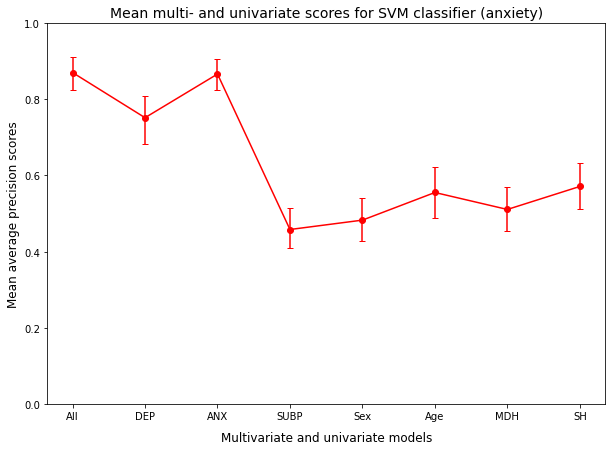

In [48]:
# Generate the plot
plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(0, 1)

plt.title('Mean multi- and univariate scores for SVM classifier (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean average precision scores', size=12)

plt.show()